# ANALISIS EXPLORATORIO DE DATOS:
## CAR DATASET

## 1. SMART Question: ¿Cuales son los factores que afectan el valor de un vehiculo?

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

## 2. Importar el dataset

In [178]:
car_df = pd.read_csv('CarPrice_Assignment.csv')

## 3. Analizar columnas, tipos de datos y la forma de los datos

###   3.1 Revisar la cantidad de columnas y filas que contiene el dataset

In [179]:
car_df.shape

(205, 26)

El dataset cuenta con una cantidad de 205 filas y 26 columnas

###    3.2 Visualizar las primeras  y ultimas filas del dataset

In [180]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [181]:
car_df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


###    3.3 Revisar los tipos de datos (Categoricos o Numericos) que contiene el dataset

In [182]:
car_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Se puede revisar el tipo de dato de cada columna para asi clasificarlos, a continuacion una breve descripción de cada columna del dataset:

CarID: Identification Number for Each Car

CarName: Name of the Car Model

FuelType: Type of Fuel Used (Gasoline, Diesel, Electric, etc.)

Aspiration: Type of Aspiration (Standard or Turbocharged)

NumDoors: Number of Doors on the Car

BodyStyle: Style of the Car's Body (Sedan, Coupe, SUV, etc.)

DriveWheelType: Type of Drive Wheels (Front, Rear, All)

EngineLocation: Location of the Car's Engine (Front or Rear)

Wheelbase: Length of the Car's Wheelbase

CarLength: Overall Length of the Car

CarWidth: Width of the Car

CarHeight: Height of the Car

CurbWeight: Weight of the Car without Passengers or Cargo

EngineType: Type of Engine (Gas, Diesel, Electric, etc.)

NumCylinders: Number of Cylinders in the Engine

EngineSize: Size of the Car's Engine

FuelSystem: Type of Fuel Delivery System

BoreRatio: Bore-to-Stroke Ratio of the Engine

Stroke: Stroke Length of the Engine

CompressionRatio: Compression Ratio of the Engine

Horsepower: Car's Engine Horsepower

PeakRPM: Engine's Peak RPM (Revolutions Per Minute)

CityMPG: Miles Per Gallon (MPG) in City Driving

HighwayMPG: MPG on the Highway

CarPrice: Price of the Car

###    3.5 Revisar la cantidad de valores unicos por columna

In [183]:
car_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

###   3.6 Visualizar la cantidad de datos nulos por columna

In [184]:
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [185]:
car_df.isnull().sum().sum()

0

En este caso no hay datos faltantes en las columnas

### 3.6 Visualizar datos descriptivos de las variables 

In [186]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Información de las estadisticas:

- 205 modelos de carros, con atributos unicos

- El rango de precio va desde los 5.118 dolares hasta los 45.400 dolares, con un promedio de $13.276 dolares

- Atributos como carwidth, curbweight y enginesize muestran una gran variedad

## 4. Clasificar variables categoricas y numericas

In [187]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                       'enginelocation','enginetype','cylindernumber','fuelsystem']

In [188]:
numerical_columns = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
                     'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

## 5. Analisis univariado por categoria

###    5.1 Analisis de columnas numericas

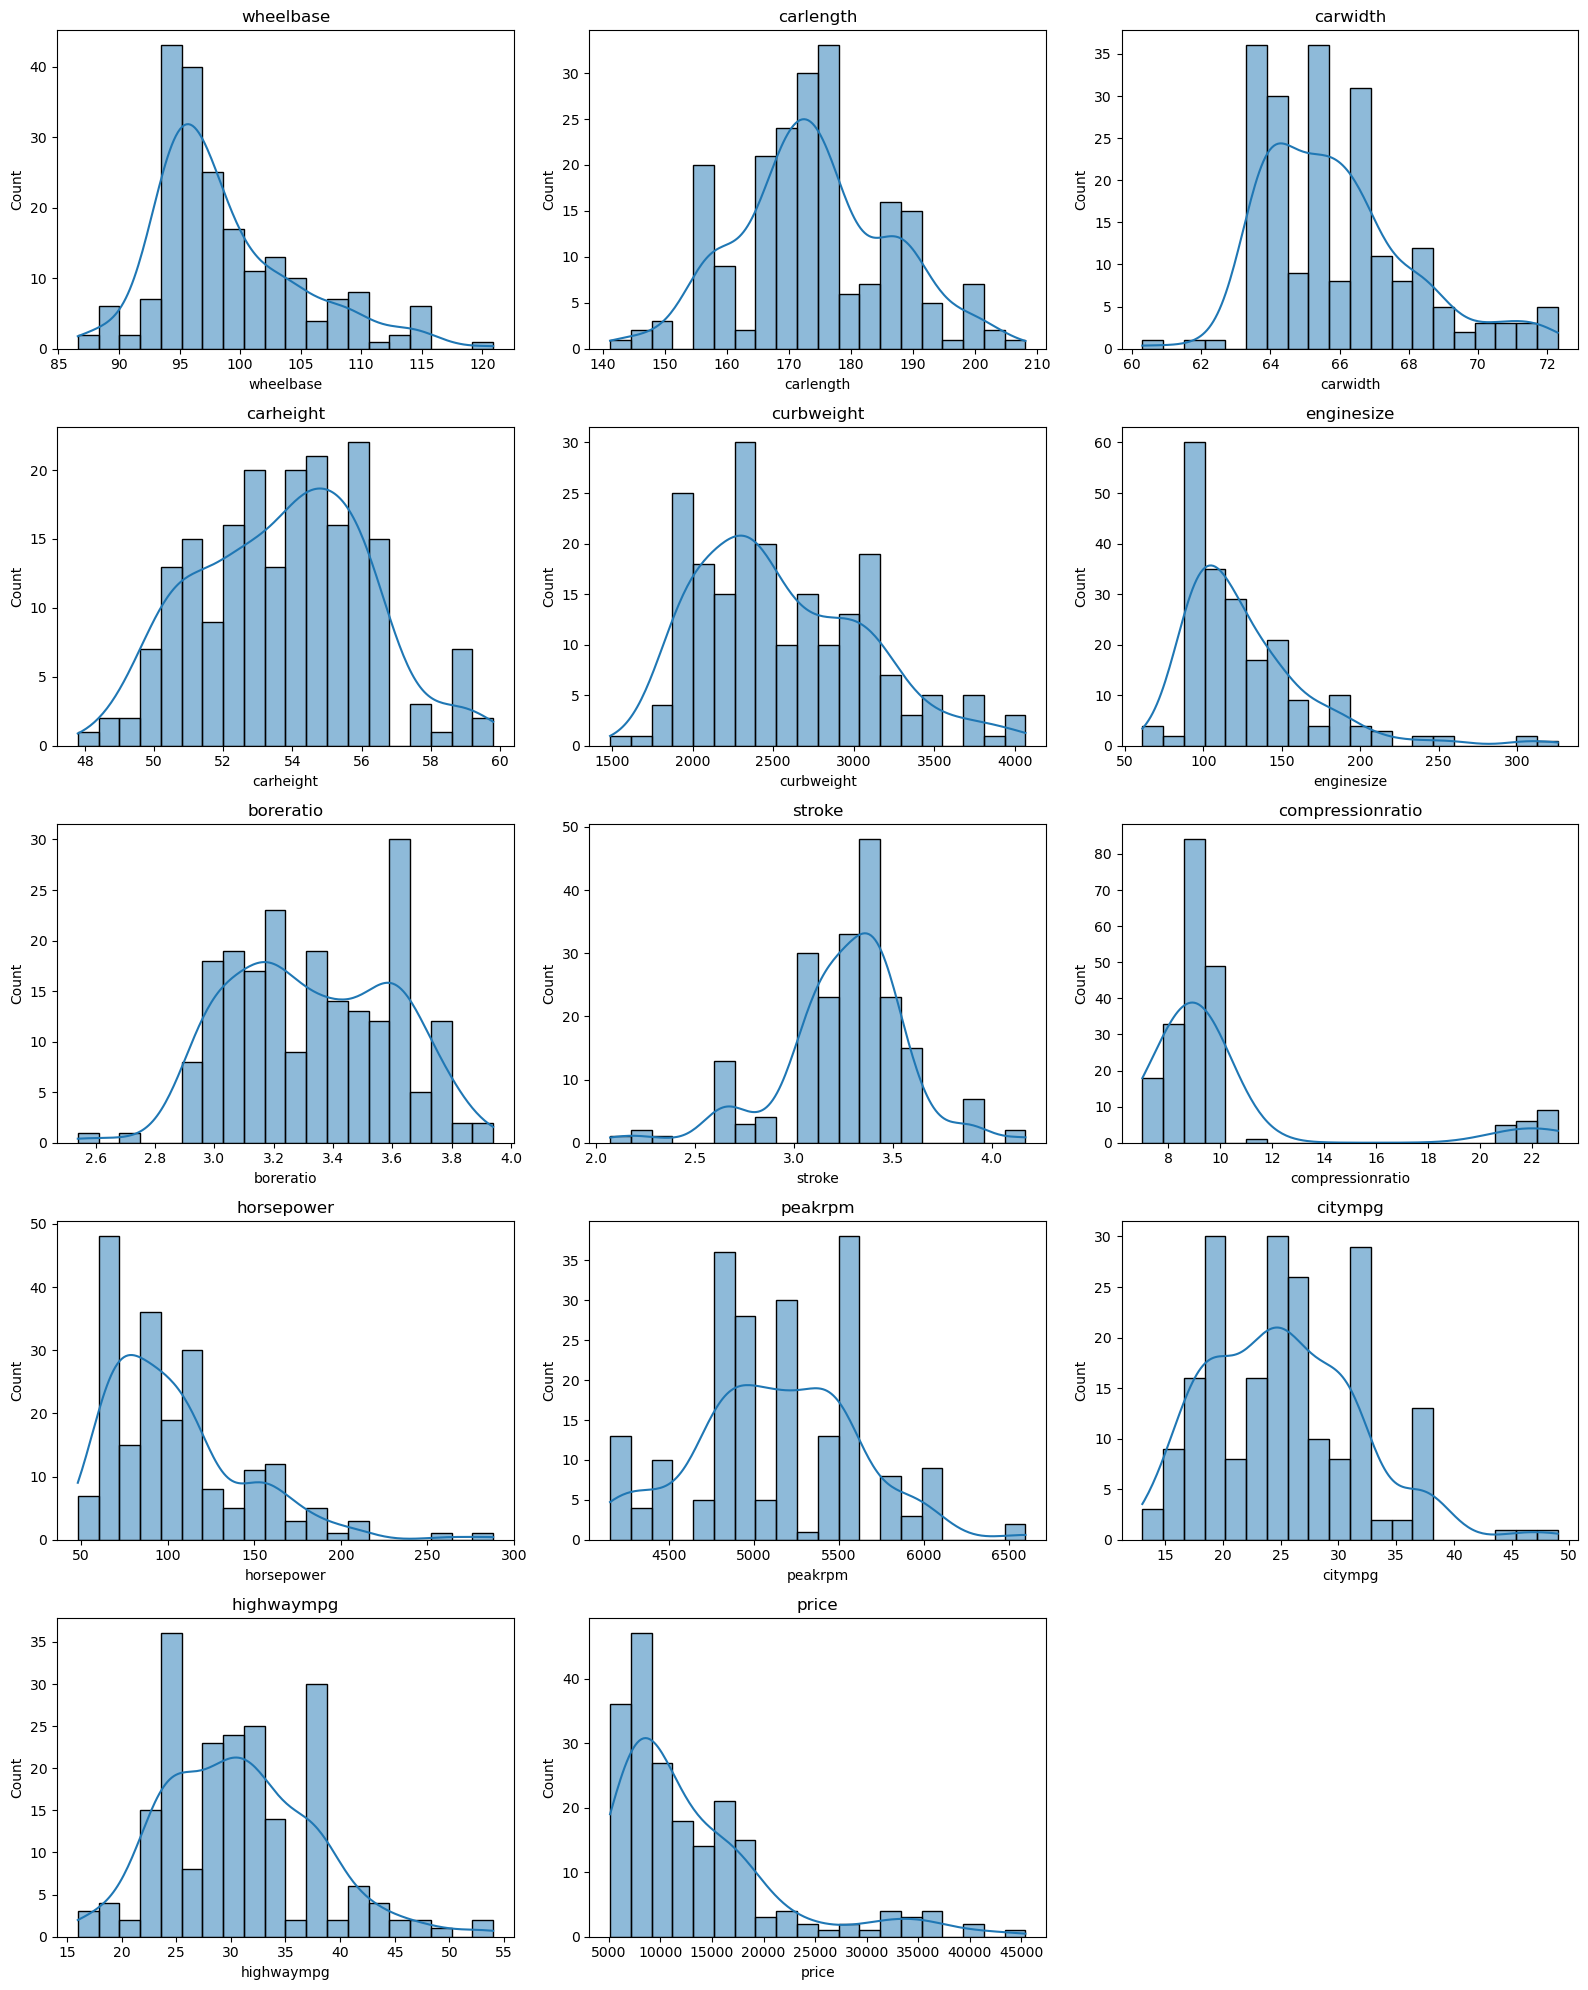

In [189]:
plt.figure(figsize=(16, 20))
for feature in numerical_columns:
    plt.subplot(5, 3, numerical_columns.index(feature) + 1)
    sns.histplot(data = car_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

###    5.2 Analisis de columnas Categoricas

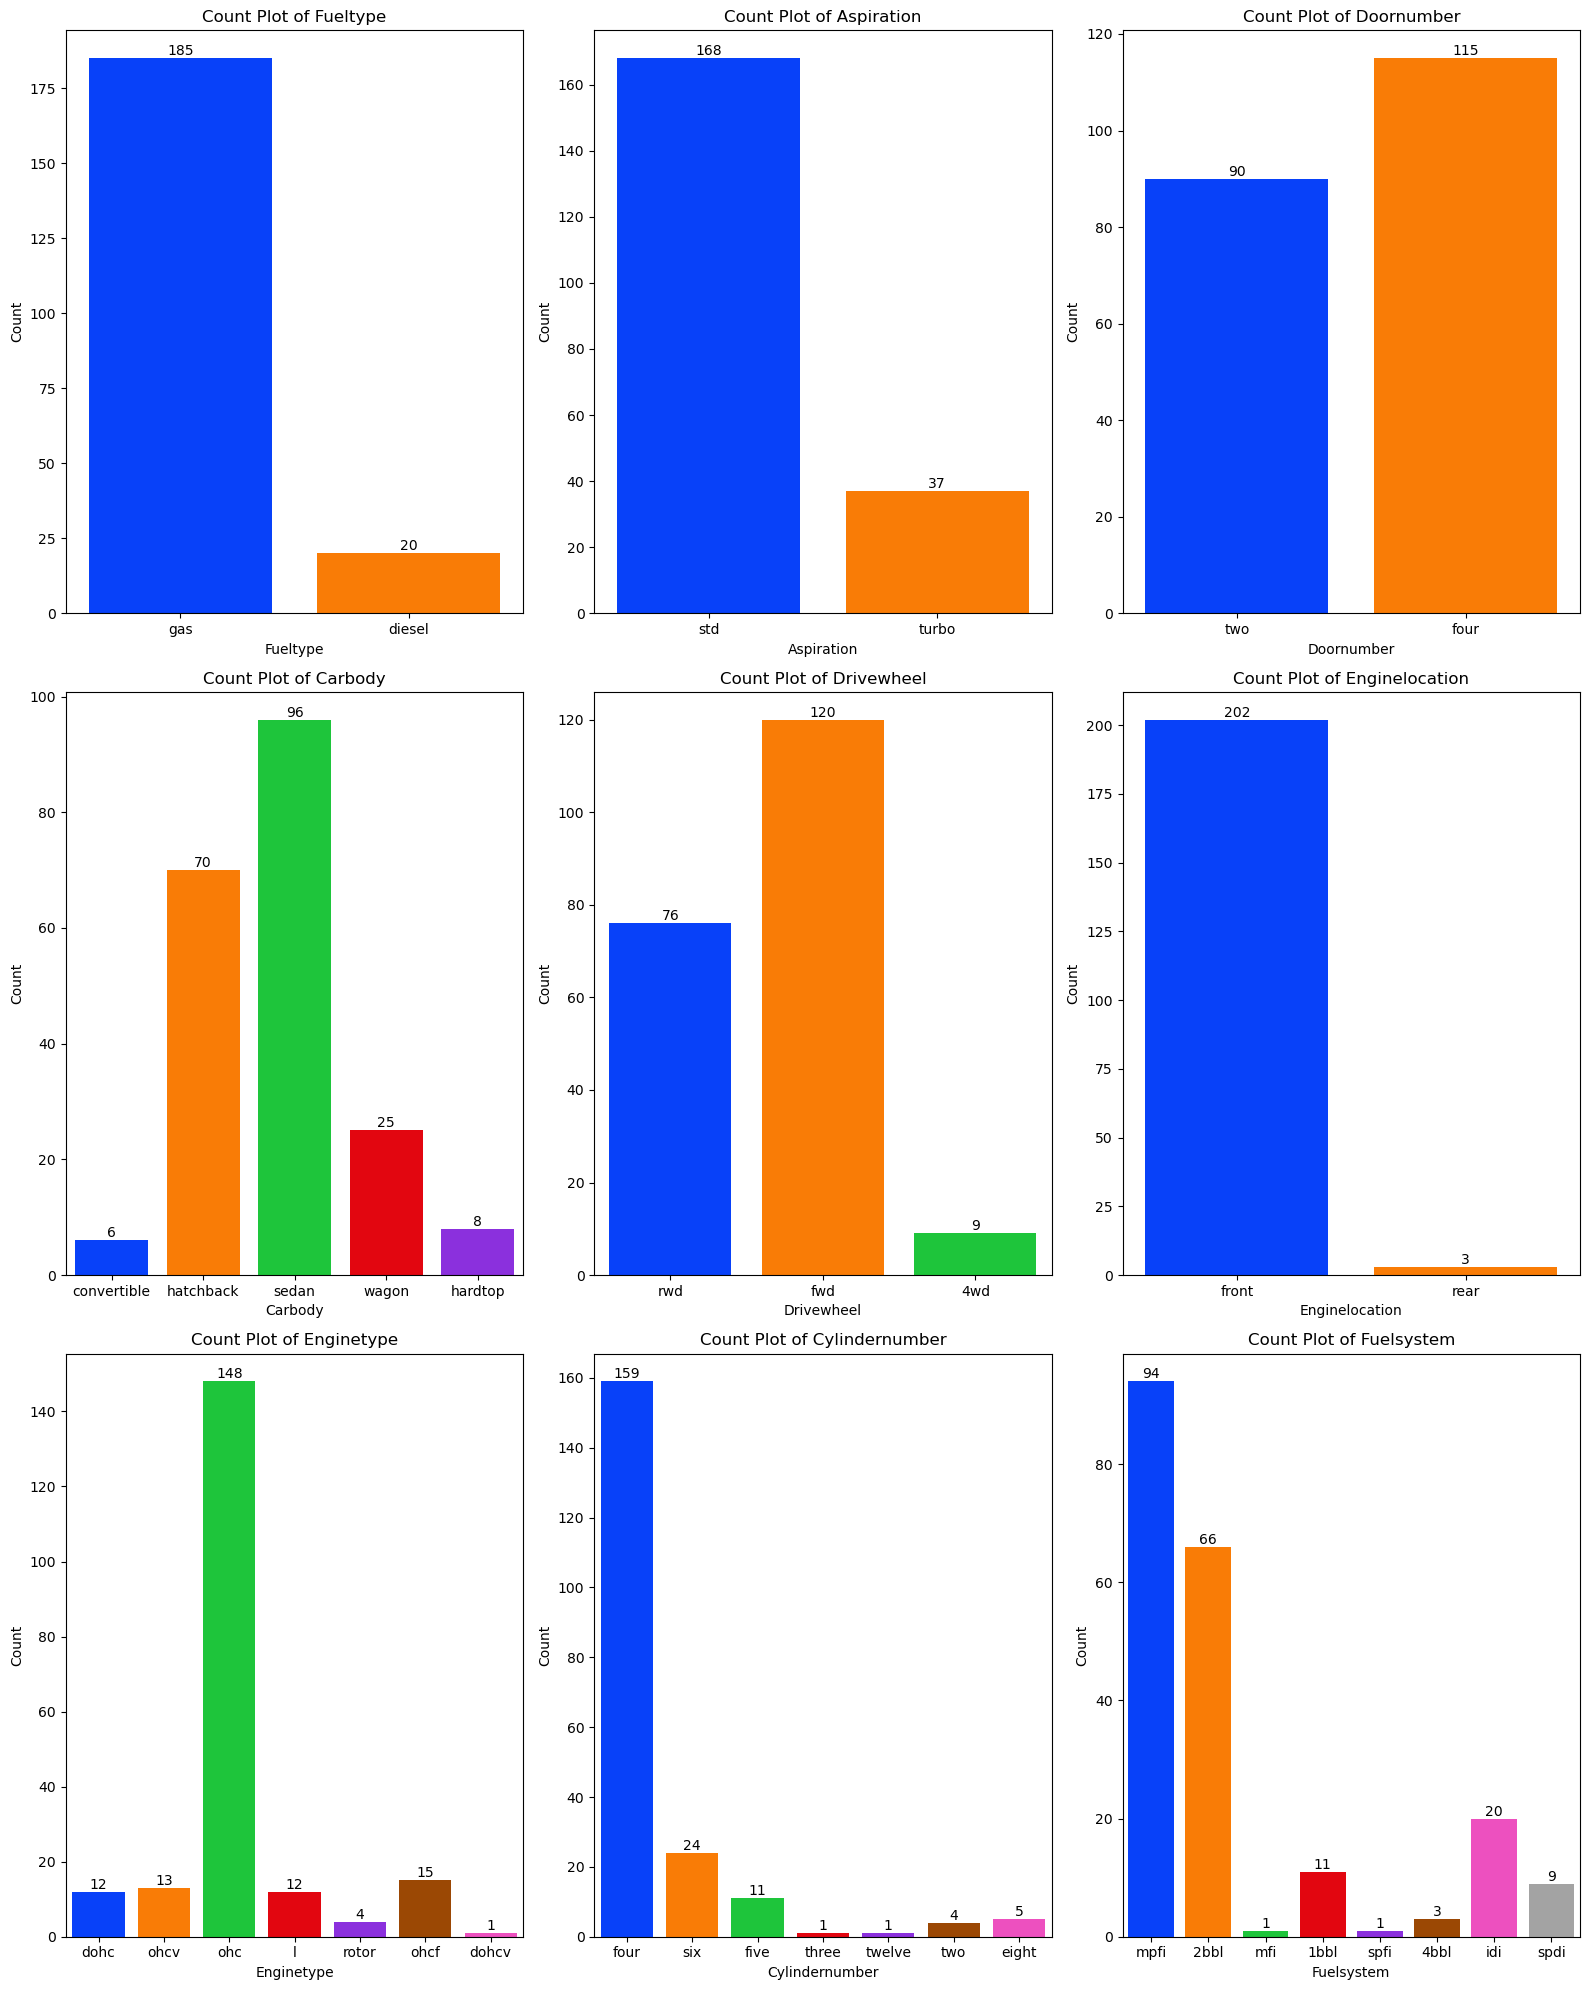

In [190]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 20))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=car_df[column], data=car_df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Debido a que CarName contiene muchas variables, vamos a mostrar los primeros 15 modelos de carros

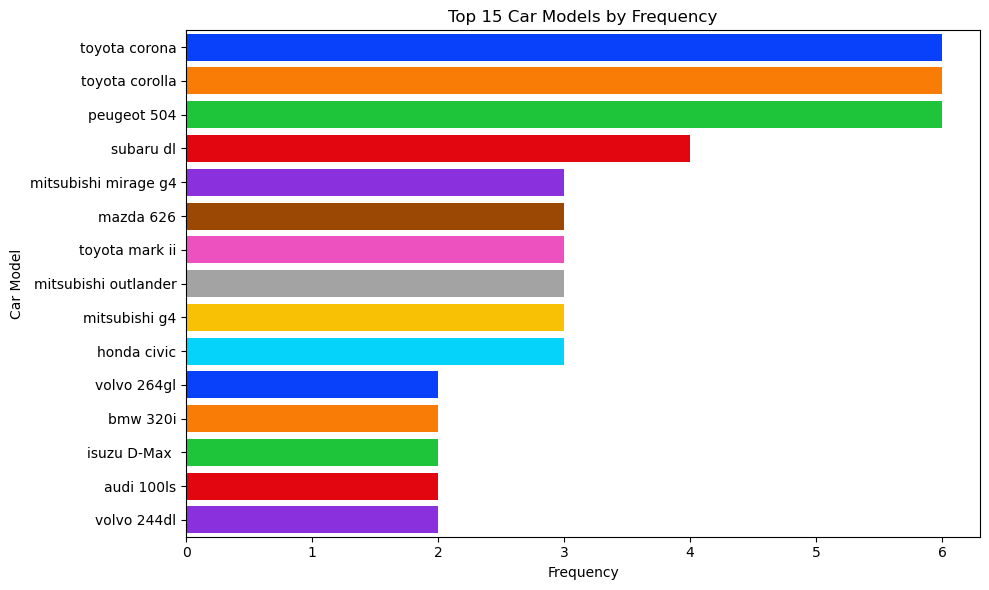

In [191]:
n = 15
top_car_models = car_df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='bright', saturation=0.95)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Comparar los primeros 15 modelos de carro por precio promedio

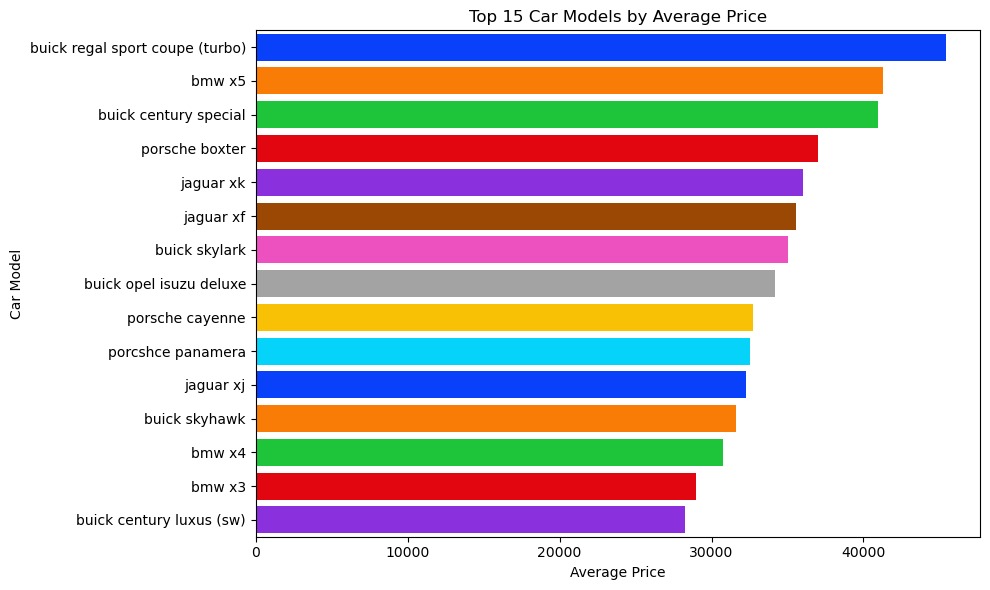

In [192]:
avg_prices_by_car = car_df.groupby('CarName')['price'].mean().sort_values(ascending=False)

n = 15
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='bright', saturation=0.95)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Comparar el resto de variables categoricas por el precio promedio

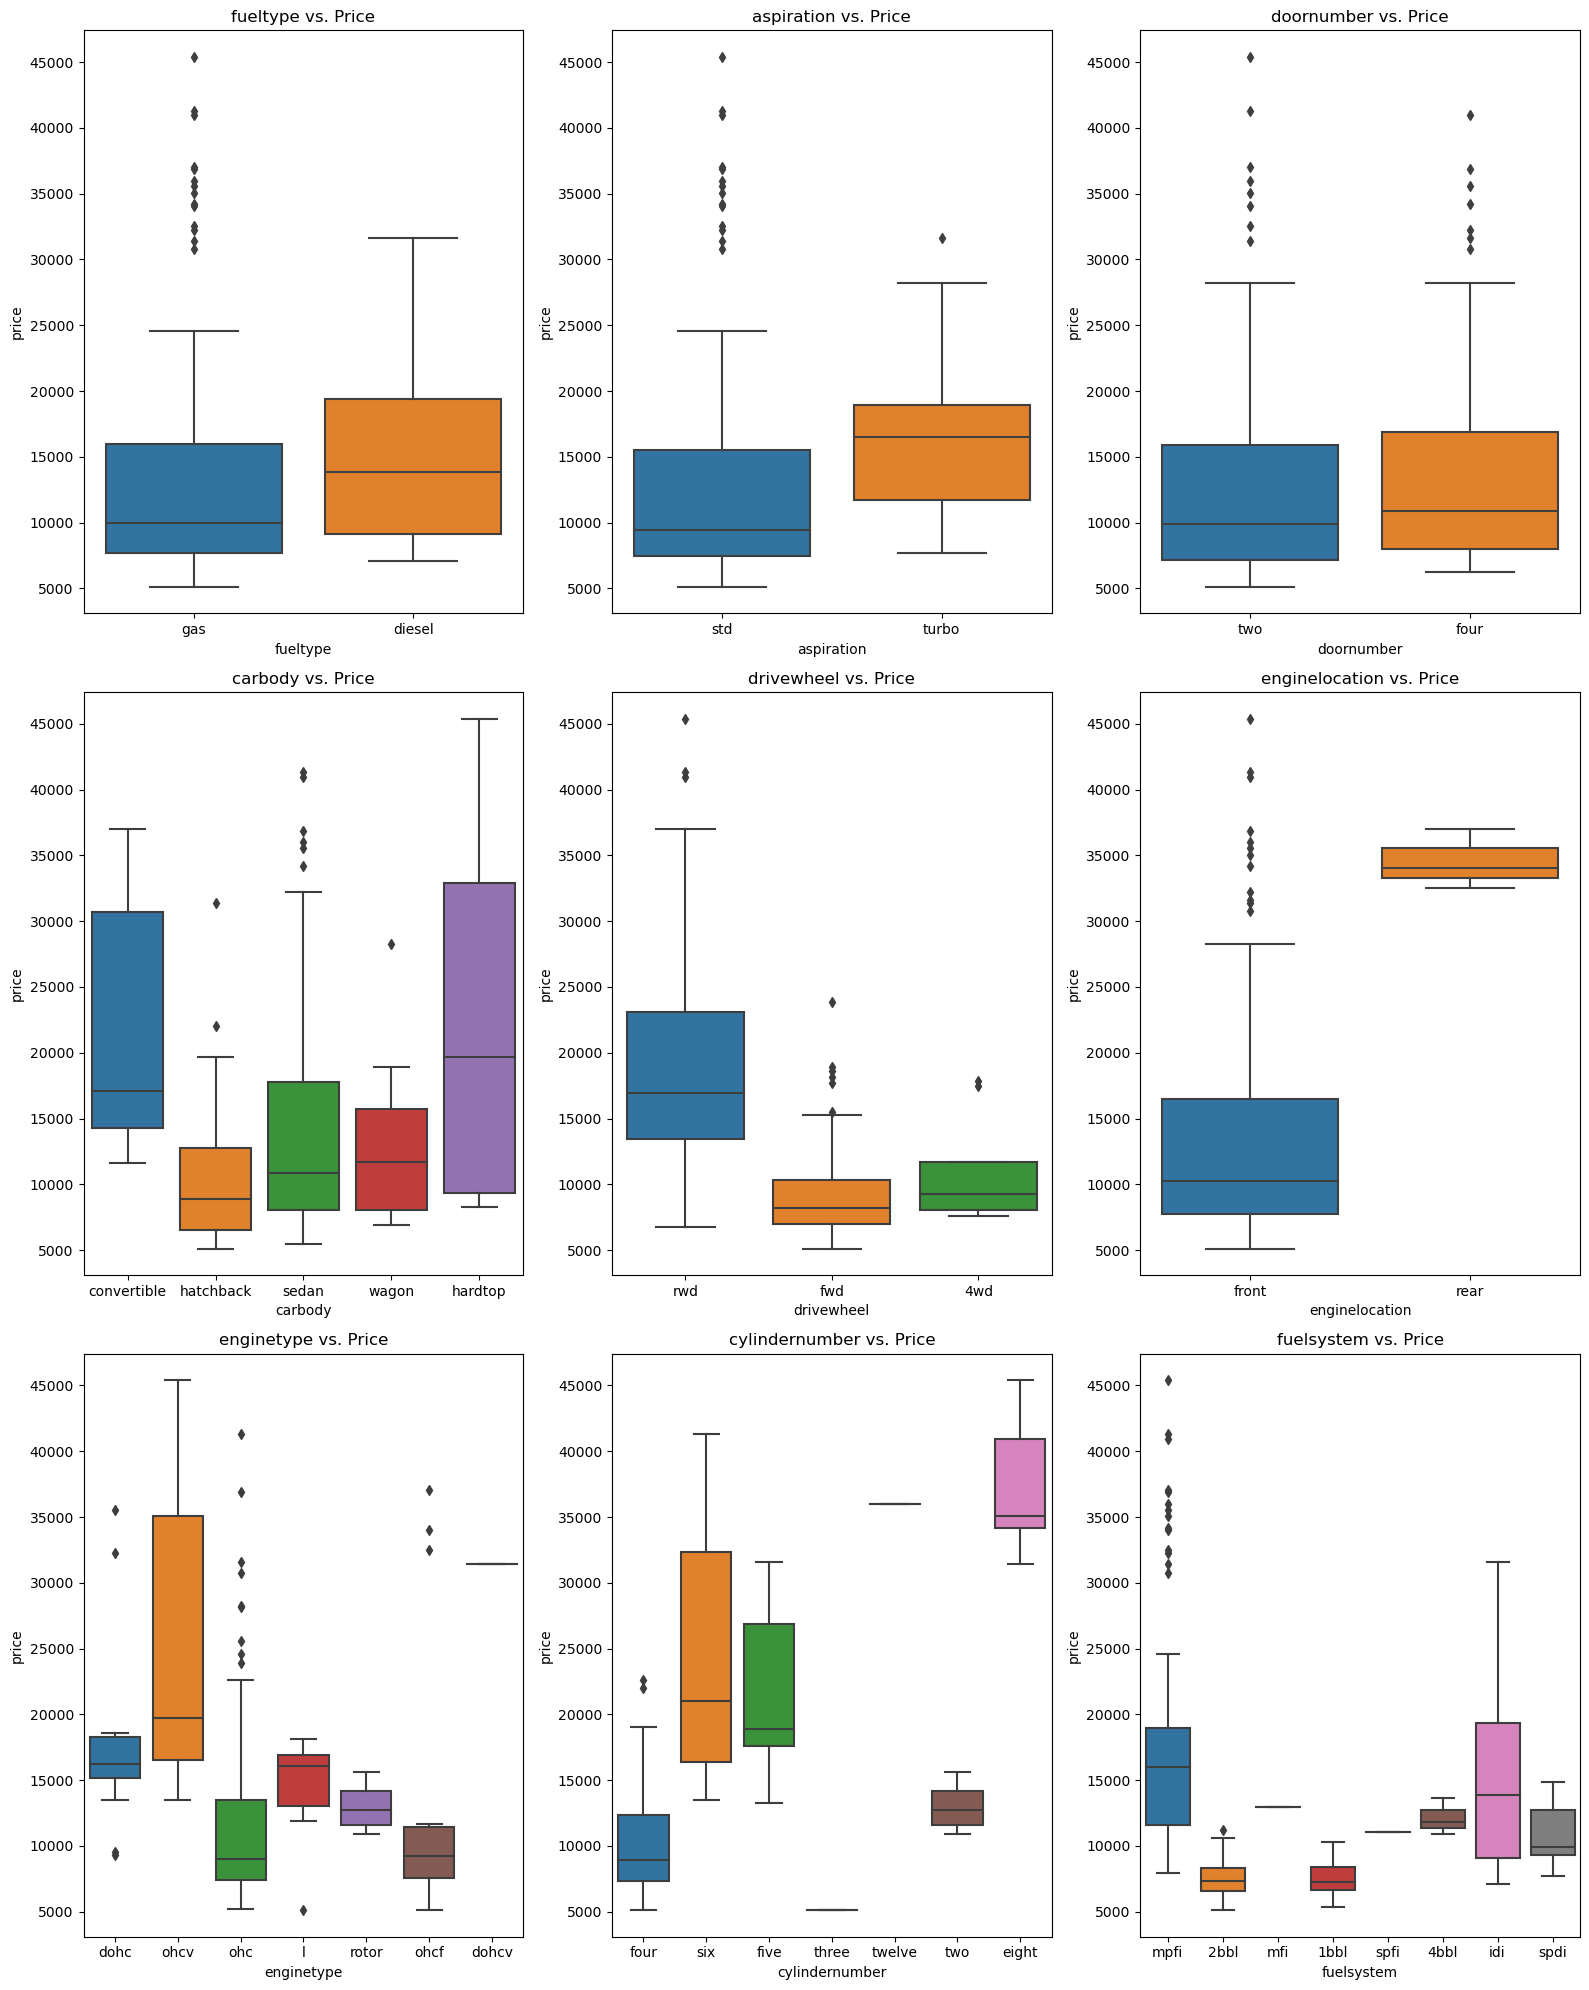

In [193]:
plt.figure(figsize=(16, 20))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=car_df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

## 6. Analisis multivariado

### 6.1 Matriz de correlación

Visualizar en el grafico las variables que tienen una mejor correlación, en este caso con el precio.

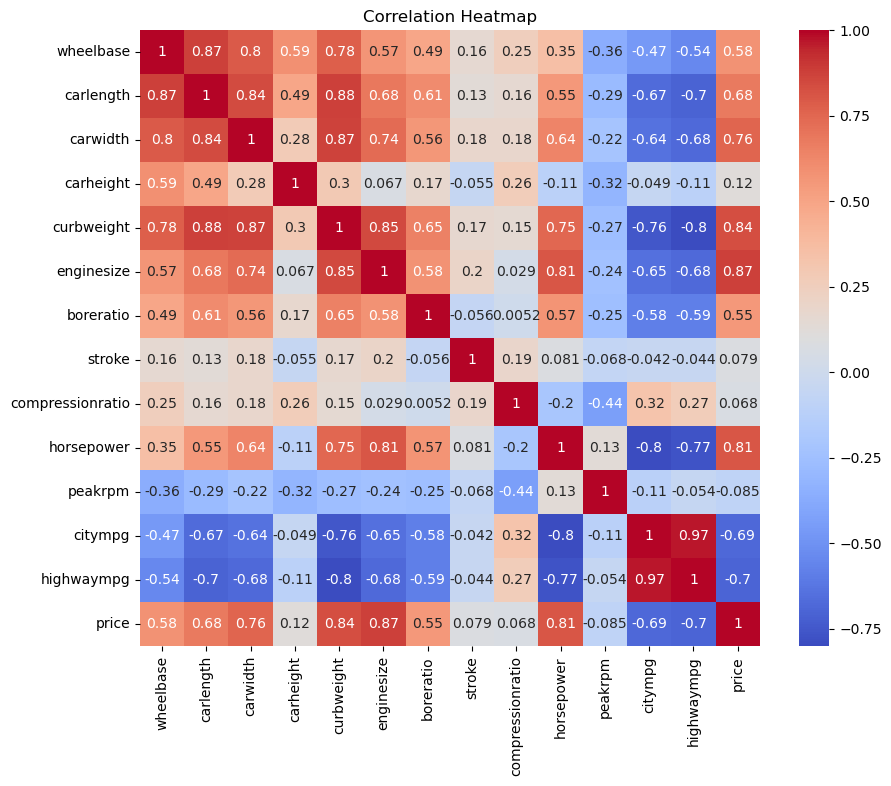

In [194]:
correlation_matrix = car_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Estandarizar los datos y prepararlos para su uso en algoritmos de aprendizaje automático.

In [195]:
scaler = StandardScaler()
car_df[numerical_columns] = scaler.fit_transform(car_df[numerical_columns])

Preparar los datos que se van a entrenar

In [196]:
car_df['price'] = car_df['price'].astype(int)

In [197]:
X = car_df[["horsepower", 'enginesize','carwidth', 'curbweight']]
y = car_df['price']

In [198]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    float64
 1   enginesize  205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB
None


Entrenar el 20% de los datos de las variables escogidas

In [199]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Calcular la precisión del modelo


Precisión del modelo: 0.85


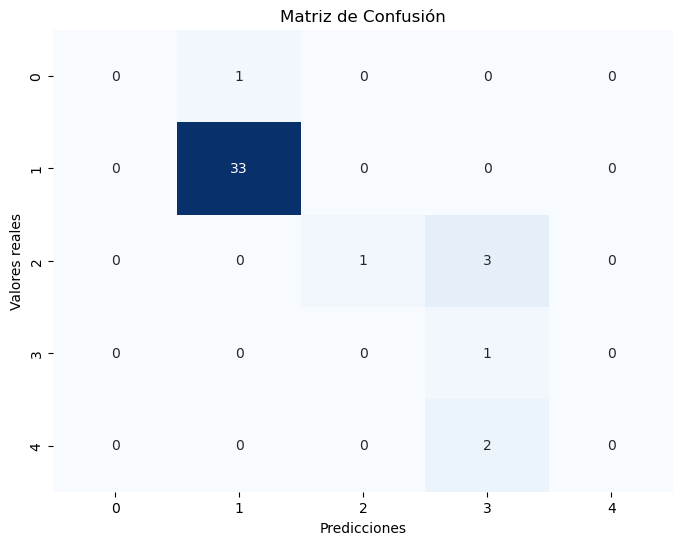


Informe de Clasificación:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.97      1.00      0.99        33
           1       1.00      0.25      0.40         4
           2       0.17      1.00      0.29         1
           3       0.00      0.00      0.00         2

    accuracy                           0.85        41
   macro avg       0.43      0.45      0.33        41
weighted avg       0.88      0.85      0.84        41



C:\Users\sbt08\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sbt08\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sbt08\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

En este caso el modelo arroja una precisión del 85% con las variables previamente escogidas, sin embargo las variables utilizadas solo fueron variables numericas

## 7. Pipeline

Establecer las variables a usar en una nueva tabla

In [201]:
df_new = car_df[['fueltype', 'aspiration', 'cylindernumber', 'enginesize', 'price', 'horsepower']]

In [202]:
df_new = df_new.dropna()
df_new.shape

(205, 6)

Eliminamos la variable objetivo de x la cual posteriormente se establece en y; Para este caso price

In [203]:
df_x = df_new.drop(columns = ['price'])
df_y = df_new['price']

In [204]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   cylindernumber  205 non-null    object 
 3   enginesize      205 non-null    float64
 4   horsepower      205 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.1+ KB


Clasificar las variables en dos grupos de acuerdo al tipo de categoria (Numerico o Categorico)

In [205]:
numeric_cols = df_x.select_dtypes(include = ['float64']).columns
categorical_cols = df_x.select_dtypes(include = ['object']).columns

Entrenar el 20% de las variables seleccionadas

In [209]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

Establecer el cojunto de pasos a seguir mediante el uso del Pipeline

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=np.nan)),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                      ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),
                                               ('cat', categorical_transformer, categorical_cols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['enginesize', 'horsepower'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['fueltype', 'aspiration', 'cylindernumber'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

El Pipeline incluye el preprocesamiento de datos y la construcción de un modelo de regresión, lo que facilita el trabajo con datos y modelos en conjunto

In [211]:
pipeline.score(X_test, y_test)

0.8536631361694179

## 8. Conclusión:

Los factores mas significativos o relevantes a la hora de establecer el precio de un vehiculo estan relacionados con el tamaño del motor, los caballos de fuerza y el tipo de combustible que se utiliza. Por otro lado aspectos como la altura del carro, consumo de millas por galon y la cantidad de puertas son variables que no aportan mucho al momento de considerar el precio del carro. 